# Error Analysis

In [1]:
import matplotlib
import matplotlib.pyplot
import pathlib
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

matplotlib.pyplot.rc('font', size=14)
matplotlib.pyplot.rc('axes', labelsize=14, titlesize=14)
matplotlib.pyplot.rc('legend', fontsize=14)
matplotlib.pyplot.rc('xtick', labelsize=10)
matplotlib.pyplot.rc('ytick', labelsize=10)

output_dir = pathlib.Path() / "images" / "end_to_end_project"
output_dir.mkdir(parents=True, exist_ok=True)
print(f'output_dir : {output_dir}')

def matplotlib_to_imagefile(output_dir, filename, imgext="png", tight_layout=True, resolution=300):
    path = output_dir / f"{filename}.{imgext}"
    if tight_layout:
        matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.savefig(path, format=imgext, dpi=resolution)

# 28 * 28 = 784
def plot_digit(vec_784):
    image = vec_784.reshape(28, 28)
    matplotlib.pyplot.imshow(image, cmap='binary')
    matplotlib.pyplot.axis('off')


dataset_save_dir = pathlib.Path("datasets")
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home=dataset_save_dir, as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, stratify = y)

output_dir : images\end_to_end_project


c:\Users\ctint\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
y_train_3 = (y_train == '3') # 책과는 좀 다르게 3-classifier를 만들어 본다
y_test_3 = (y_test == '3')

sgd_clf = sklearn.linear_model.SGDClassifier()
sgd_clf.fit(X_train, y_train_3)

SGDClassifier()

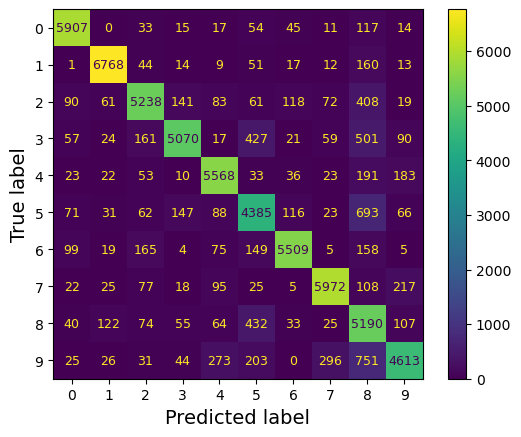

In [4]:
import sklearn.metrics

y_train_pred = sklearn.model_selection.cross_val_predict(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)
matplotlib.pyplot.rc('font', size=9)  # extra code – make the text smaller
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
matplotlib.pyplot.show()

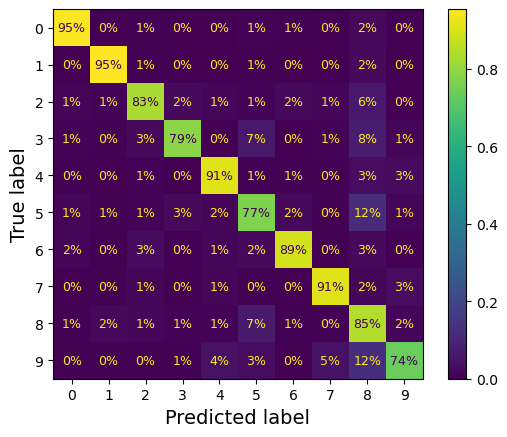

In [6]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true', values_format='.0%')
matplotlib.pyplot.show()

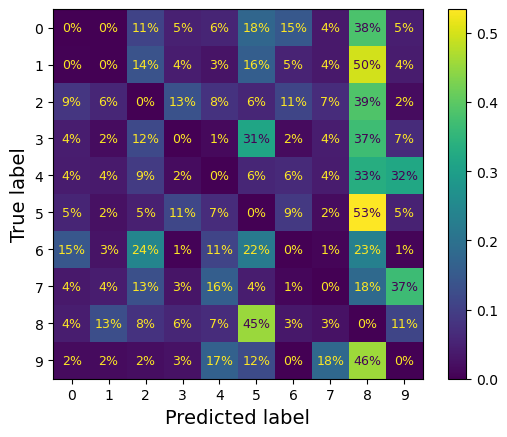

In [9]:
sample_weight = (y_train_pred != y_train)

# normalize : {'true', 'pred', 'all'}, default=None
#   if 'true', the confusion matrix is normalized over the true conditions (e.g. rows);
#   if 'pred', the confusion matrix is normalized over the predicted conditions (e.g. columns);
#   if 'all', the confusion matrix is normalized by the total number of samples;
#   if None (default), the confusion matrix will not be normalized.

sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
matplotlib.pyplot.show()

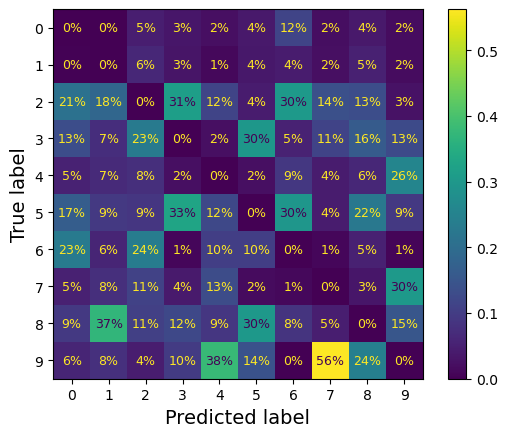

In [10]:
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
matplotlib.pyplot.show()

In [11]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

0.0 1.0 0.0 1.0
1.0 2.0 0.0 1.0
2.0 3.0 0.0 1.0
3.0 4.0 0.0 1.0
4.0 5.0 0.0 1.0
0.0 1.0 1.0 2.0
1.0 2.0 1.0 2.0
2.0 3.0 1.0 2.0
3.0 4.0 1.0 2.0
4.0 5.0 1.0 2.0
0.0 1.0 2.0 3.0
1.0 2.0 2.0 3.0
2.0 3.0 2.0 3.0
3.0 4.0 2.0 3.0
4.0 5.0 2.0 3.0
0.0 1.0 3.0 4.0
1.0 2.0 3.0 4.0
2.0 3.0 3.0 4.0
3.0 4.0 3.0 4.0
4.0 5.0 3.0 4.0
0.0 1.0 4.0 5.0
1.0 2.0 4.0 5.0
2.0 3.0 4.0 5.0
3.0 4.0 4.0 5.0
4.0 5.0 4.0 5.0
5.2 6.2 0.0 1.0
6.2 7.2 0.0 1.0
7.2 8.2 0.0 1.0
8.2 9.2 0.0 1.0
9.2 10.2 0.0 1.0
5.2 6.2 1.0 2.0
6.2 7.2 1.0 2.0
7.2 8.2 1.0 2.0
8.2 9.2 1.0 2.0
9.2 10.2 1.0 2.0
5.2 6.2 2.0 3.0
6.2 7.2 2.0 3.0
7.2 8.2 2.0 3.0
8.2 9.2 2.0 3.0
9.2 10.2 2.0 3.0
5.2 6.2 3.0 4.0
6.2 7.2 3.0 4.0
7.2 8.2 3.0 4.0
8.2 9.2 3.0 4.0
9.2 10.2 3.0 4.0
5.2 6.2 4.0 5.0
6.2 7.2 4.0 5.0
7.2 8.2 4.0 5.0
8.2 9.2 4.0 5.0
9.2 10.2 4.0 5.0
0.0 1.0 5.2 6.2
1.0 2.0 5.2 6.2
2.0 3.0 5.2 6.2
3.0 4.0 5.2 6.2
4.0 5.0 5.2 6.2
0.0 1.0 6.2 7.2
1.0 2.0 6.2 7.2
2.0 3.0 6.2 7.2
3.0 4.0 6.2 7.2
4.0 5.0 6.2 7.2
0.0 1.0 7.2 8.2
1.0 2.0 7.2 8.2
2.0

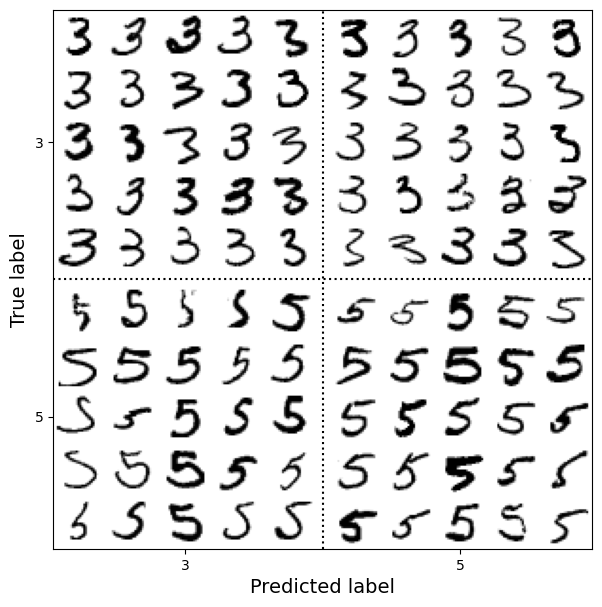

In [15]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
matplotlib.pyplot.figure(figsize=(7, 7))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        print(x,x+1,y,y+1)
        matplotlib.pyplot.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
        
matplotlib.pyplot.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
matplotlib.pyplot.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
matplotlib.pyplot.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
matplotlib.pyplot.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
matplotlib.pyplot.axis([0, 2 * size + pad, 0, 2 * size + pad])
matplotlib.pyplot.xlabel("Predicted label")
matplotlib.pyplot.ylabel("True label")
matplotlib.pyplot.show()